In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Objectives and Goals

We collected a student data consisting of 9 input variables, and 1 output variable to predict their final average score.

In [3]:
path="exams(1).csv"
df=pd.read_csv(path)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59.0,-70.0,NaN
1,male,group D,associate's degree,standard,none,96.0,93.0,187.0
2,female,group D,some college,free/reduced,NaN,57.0,76.0,77.0
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77.0,77.0,71.0
996,male,group C,some college,standard,none,80.0,66.0,66.0
997,female,group A,high school,standard,completed,67.0,86.0,86.0
998,male,group E,high school,standard,none,80.0,NaN,62.0


In [4]:
display(df.describe())
display(df.info())

,math score,reading score,writing score
count,985.000000,993.000000,993.000000
mean,67.540102,70.832830,69.050352
std,16.770469,27.039365,16.525868
min,-81.000000,-70.000000,-72.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,120.000000,770.000000,187.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      995 non-null    object 
 5   math score                   985 non-null    float64
 6   reading score                993 non-null    float64
 7   writing score                993 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


None

In [5]:
## Identifying all columns

cols_vars = list(df.columns)


for name in cols_vars:
    print(name)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


# Columns Explanation
The gender columns specifies weather a student is a Male or Female

race/ethnicity specifies the ethnic background for each student to study how it may affect their final score

parental level of education might describe how an acadamic level of the student's household may affect their final score

lunch specifies standard price or either free or reduced price

test preparation course specifies weather a student completed a certain preparation test or either did not participate or field the test

math score specifies math course score

reading score specifies reading course score

writing score specifies writing course score

# Identifying ouliers/extreme values before and after Data Wrangling step

Index(['math score', 'reading score', 'writing score'], dtype='object')


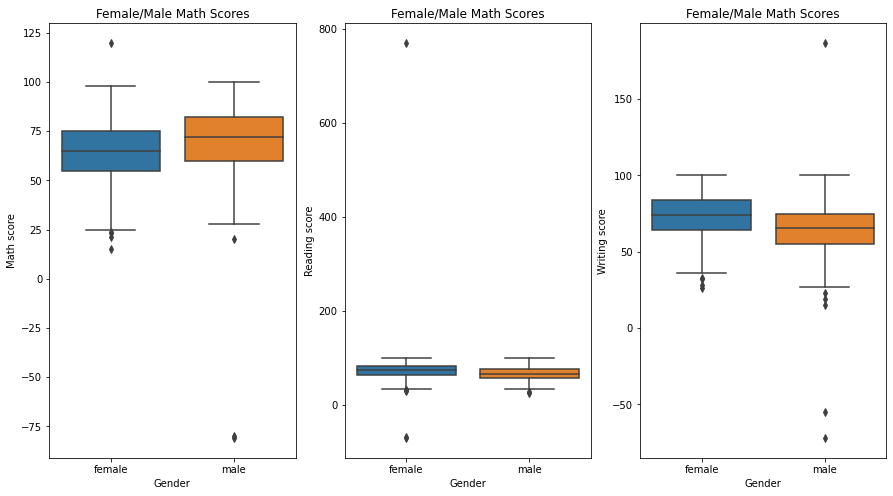

In [6]:
df_student_copy=df.copy()
n_cols=df_student_copy.select_dtypes(exclude="object").columns
print(n_cols)
fig,axs=plt.subplots(1,3,figsize=(15,8))
#Plotting Female On Male Scores
sns.boxplot(ax=axs[0],data=df_student_copy,x="gender",y=n_cols[0])
axs[0].set_title("Female/Male Math Scores")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel(str(n_cols[0]).capitalize())

sns.boxplot(ax=axs[1],data=df_student_copy,x="gender",y=n_cols[1])
axs[1].set_title("Female/Male Math Scores")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel(str(n_cols[1]).capitalize())

sns.boxplot(ax=axs[2],data=df_student_copy,x="gender",y=n_cols[2])
axs[2].set_title("Female/Male Math Scores")
axs[2].set_xlabel("Gender")
axs[2].set_ylabel(str(n_cols[2]).capitalize())

plt.show()

##### Figure 1

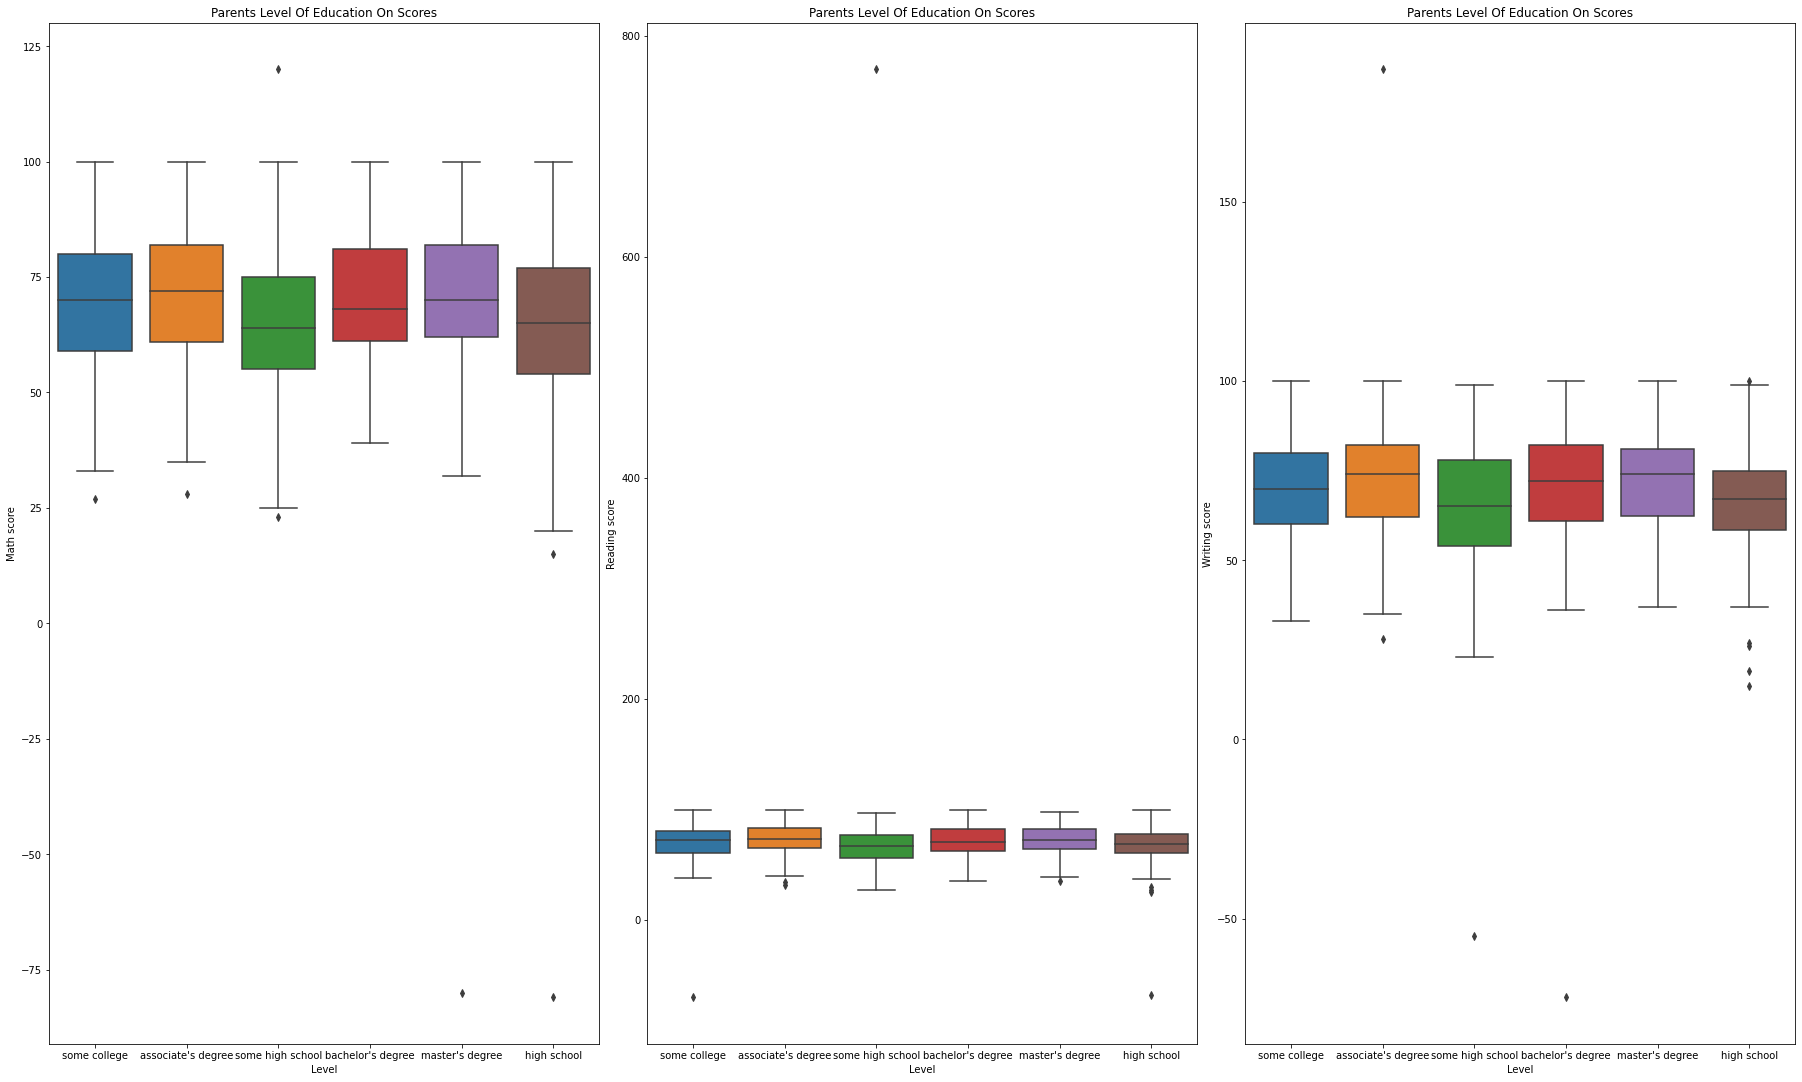

In [7]:
#Parents Level Of Education On Scores
fig,axs=plt.subplots(1,3,figsize=(25,15))
sns.boxplot(ax=axs[0],data=df_student_copy,x="parental level of education",y=n_cols[0])
axs[0].set_title("Parents Level Of Education On Scores")
axs[0].set_xlabel("Level")
axs[0].set_ylabel(str(n_cols[0]).capitalize())

sns.boxplot(ax=axs[1],data=df_student_copy,x="parental level of education",y=n_cols[1])
axs[1].set_title("Parents Level Of Education On Scores")
axs[1].set_xlabel("Level")
axs[1].set_ylabel(str(n_cols[1]).capitalize())

sns.boxplot(ax=axs[2],data=df_student_copy,x="parental level of education",y=n_cols[2])
axs[2].set_title("Parents Level Of Education On Scores")
axs[2].set_xlabel("Level")
axs[2].set_ylabel(str(n_cols[2]).capitalize())
plt.tight_layout(pad=0.6)
plt.show()

plt.show()

##### Figure 2

## Data Wrangling

There are NO inconsistencies in our data all numrical and catagorical columns are consistant with the numbering system and spelling of catagorical data are also consistant

### Fixing negative and extreme/outliers scores in numerical columns

In [8]:
## Noisy Data can be scores negative values and extreme
display(df) ## before cleaning
seleted_cols= df.select_dtypes(exclude='object').columns

for col in seleted_cols: ## Displying columns where Noisy values might occure
    print(col)

df[seleted_cols]=df[seleted_cols].applymap(lambda x: x if x>=0 else abs(x)) ## Fix negative scores
## Outliers
seleted_cols= df.select_dtypes(exclude='object').columns
q1 = df[seleted_cols].quantile(0.25)
q3 = df[seleted_cols].quantile(0.75)
IQR = q3-q1
for i in seleted_cols:
    fix_outliers = lambda x: x if df[i].quantile(0.25) - 1.5 * IQR[i] <= x <= df[i].quantile(0.75) + 1.5 * IQR[i] else df[i].quantile(0.25) if x < df[i].quantile(0.25) else df[i].quantile(0.75)
    df[seleted_cols] = df[seleted_cols].applymap(fix_outliers)
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59.0,-70.0,NaN
1,male,group D,associate's degree,standard,none,96.0,93.0,187.0
2,female,group D,some college,free/reduced,NaN,57.0,76.0,77.0
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77.0,77.0,71.0
996,male,group C,some college,standard,none,80.0,66.0,66.0
997,female,group A,high school,standard,completed,67.0,86.0,86.0
998,male,group E,high school,standard,none,80.0,NaN,62.0


math score
reading score
writing score


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59.0,70.0,80.0
1,male,group D,associate's degree,standard,none,96.0,93.0,80.0
2,female,group D,some college,free/reduced,NaN,57.0,76.0,77.0
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77.0,77.0,71.0
996,male,group C,some college,standard,none,80.0,66.0,66.0
997,female,group A,high school,standard,completed,67.0,86.0,86.0
998,male,group E,high school,standard,none,80.0,80.0,62.0


In [9]:
## Handling Missing Data
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns) ## Listing of missing data
## Fixing the missing data
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        print (value)
        value = value[0]
        print (value)
    df[c].fillna(value,inplace=True)

display(df)

Columns with NaN values are: Index(['test preparation course'], dtype='object')
0    none
Name: test preparation course, dtype: object
none


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59.0,70.0,80.0
1,male,group D,associate's degree,standard,none,96.0,93.0,80.0
2,female,group D,some college,free/reduced,none,57.0,76.0,77.0
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77.0,77.0,71.0
996,male,group C,some college,standard,none,80.0,66.0,66.0
997,female,group A,high school,standard,completed,67.0,86.0,86.0
998,male,group E,high school,standard,none,80.0,80.0,62.0


In [10]:
## Add two columns
df['Avg(R+W Score)'] = round((df['reading score'] + df['writing score'])/2)
df['Avg(Total Score)'] = round((df['reading score'] + df['writing score'] + df['math score'])/3)

In [11]:
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg(R+W Score),Avg(Total Score)
0,female,group D,some college,standard,completed,59.0,70.0,80.0,75.0,70.0
1,male,group D,associate's degree,standard,none,96.0,93.0,80.0,86.0,90.0
2,female,group D,some college,free/reduced,none,57.0,76.0,77.0,76.0,70.0
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0,66.0,68.0
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0,86.0,85.0
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77.0,77.0,71.0,74.0,75.0
996,male,group C,some college,standard,none,80.0,66.0,66.0,66.0,71.0
997,female,group A,high school,standard,completed,67.0,86.0,86.0,86.0,80.0
998,male,group E,high school,standard,none,80.0,80.0,62.0,71.0,74.0


In [12]:
## Save it on a clean file

df.to_csv('cleanData2',index=False,header=True)

In [13]:
df = pd.read_csv('cleanData2')
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg(R+W Score),Avg(Total Score)
0,female,group D,some college,standard,completed,59.0,70.0,80.0,75.0,70.0
1,male,group D,associate's degree,standard,none,96.0,93.0,80.0,86.0,90.0
2,female,group D,some college,free/reduced,none,57.0,76.0,77.0,76.0,70.0
3,male,group B,some college,free/reduced,none,70.0,70.0,63.0,66.0,68.0
4,female,group D,associate's degree,standard,none,83.0,85.0,86.0,86.0,85.0
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77.0,77.0,71.0,74.0,75.0
996,male,group C,some college,standard,none,80.0,66.0,66.0,66.0,71.0
997,female,group A,high school,standard,completed,67.0,86.0,86.0,86.0,80.0
998,male,group E,high school,standard,none,80.0,80.0,62.0,71.0,74.0


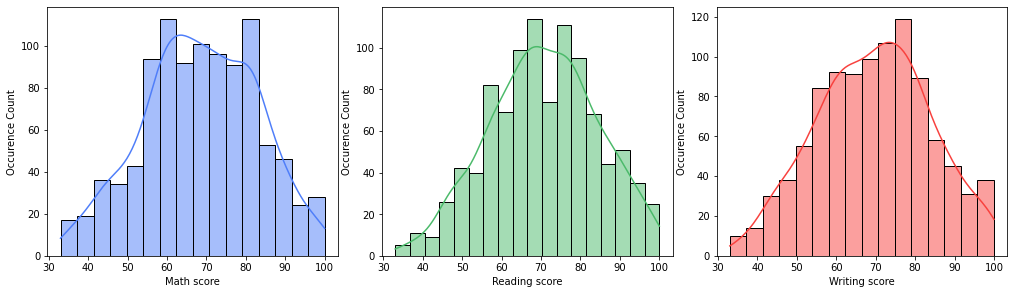

In [14]:
## graphs based on one single variable
df_student_copy=df.copy()
colors=["#4f7ef9","#4bba6a","#f8413e"]
# This is gonna select only the score cols
n_cols=df.select_dtypes(exclude="object").columns

#Plot Distributions
fig,axs=plt.subplots(1,3,figsize=(14,4))
axs=axs.flat
for colm,ax,color in zip(n_cols,axs,colors):
    sns.histplot(ax=ax,data=df_student_copy,x=colm,kde=True,color=color)
    ax.set_xlabel(str(colm).capitalize())
    ax.set_ylabel("Occurence Count")
    
    
plt.tight_layout(pad=0.4)
plt.show()

All three graphs tend to follow a bell curve shape, due to the fixing of outliers data

##### Figure 3

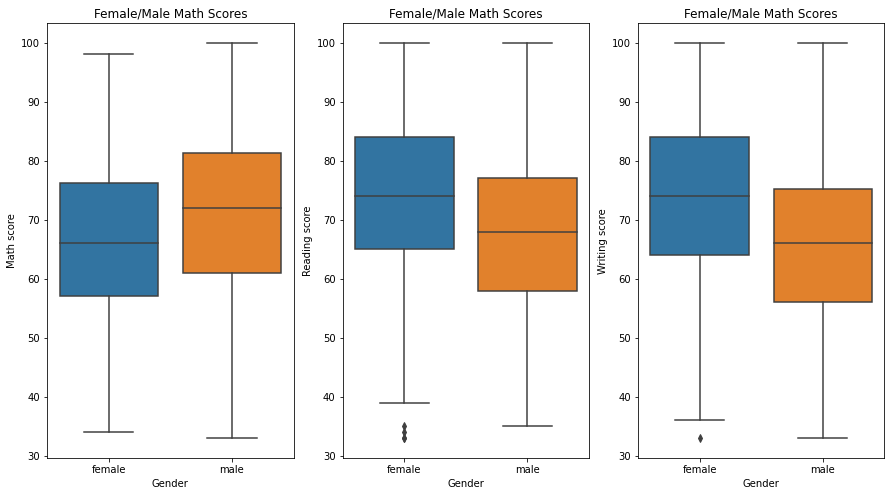

In [15]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
#Plotting Female On Male Scores
sns.boxplot(ax=axs[0],data=df_student_copy,x="gender",y=n_cols[0])
axs[0].set_title("Female/Male Math Scores")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel(str(n_cols[0]).capitalize())

sns.boxplot(ax=axs[1],data=df_student_copy,x="gender",y=n_cols[1])
axs[1].set_title("Female/Male Math Scores")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel(str(n_cols[1]).capitalize())

sns.boxplot(ax=axs[2],data=df_student_copy,x="gender",y=n_cols[2])
axs[2].set_title("Female/Male Math Scores")
axs[2].set_xlabel("Gender")
axs[2].set_ylabel(str(n_cols[2]).capitalize())

plt.show()

##### Figure 4

### Notse about the boxplot figure after fixing the outliers

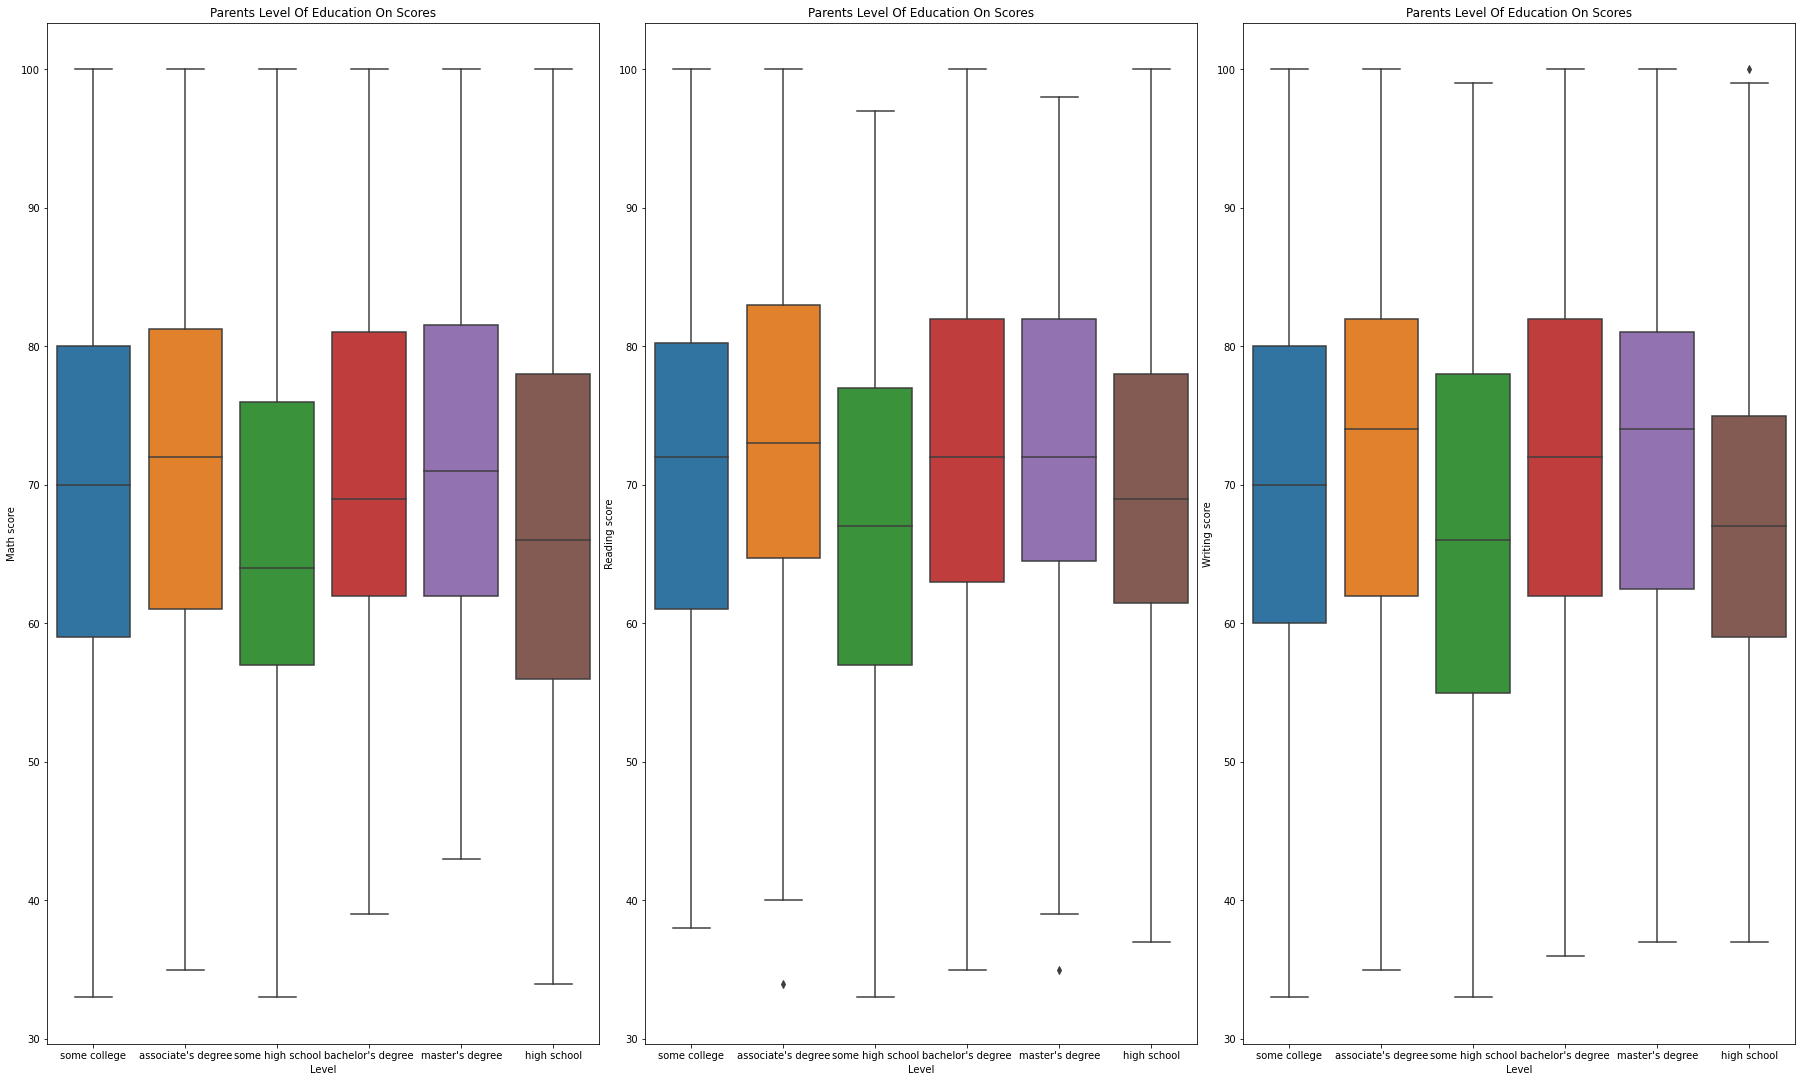

In [16]:
#Parents Level Of Education On Scores
fig,axs=plt.subplots(1,3,figsize=(25,15))
sns.boxplot(ax=axs[0],data=df_student_copy,x="parental level of education",y=n_cols[0])
axs[0].set_title("Parents Level Of Education On Scores")
axs[0].set_xlabel("Level")
axs[0].set_ylabel(str(n_cols[0]).capitalize())

sns.boxplot(ax=axs[1],data=df_student_copy,x="parental level of education",y=n_cols[1])
axs[1].set_title("Parents Level Of Education On Scores")
axs[1].set_xlabel("Level")
axs[1].set_ylabel(str(n_cols[1]).capitalize())

sns.boxplot(ax=axs[2],data=df_student_copy,x="parental level of education",y=n_cols[2])
axs[2].set_title("Parents Level Of Education On Scores")
axs[2].set_xlabel("Level")
axs[2].set_ylabel(str(n_cols[2]).capitalize())
plt.tight_layout(pad=0.6)
plt.show()

plt.show()

##### Figure 5

According figure 3 it looks likes our data mostly follows a normal curve shape, with almost zero skewness. Moreover, figure 4 and figure 5 approves that our step in handaling outliers has shown to be effective when comparing with both figure 1 and figure 2.

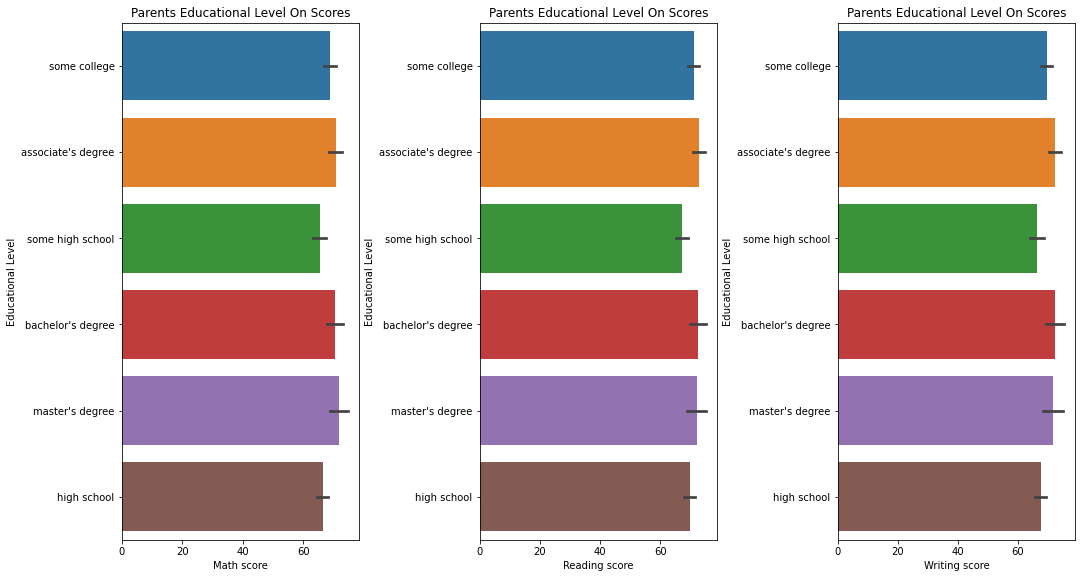

In [17]:
level_education=df_student_copy["parental level of education"]
fig,axs=plt.subplots(1,3,figsize=(15,8))
sns.barplot(ax=axs[0],data=df_student_copy,x=n_cols[0],y=level_education)
axs[0].set_title("Parents Educational Level On Scores")
axs[0].set_xlabel(str(n_cols[0]).capitalize())
axs[0].set_ylabel("Educational Level")

sns.barplot(ax=axs[1],data=df_student_copy,x=n_cols[1],y=level_education)
axs[1].set_title("Parents Educational Level On Scores")
axs[1].set_xlabel(str(n_cols[1]).capitalize())
axs[1].set_ylabel("Educational Level")

sns.barplot(ax=axs[2],data=df_student_copy,x=n_cols[2],y=level_education)
axs[2].set_title("Parents Educational Level On Scores")
axs[2].set_xlabel(str(n_cols[2]).capitalize())
axs[2].set_ylabel("Educational Level")
plt.tight_layout(pad=0.6)
plt.show()


##### Figure 6

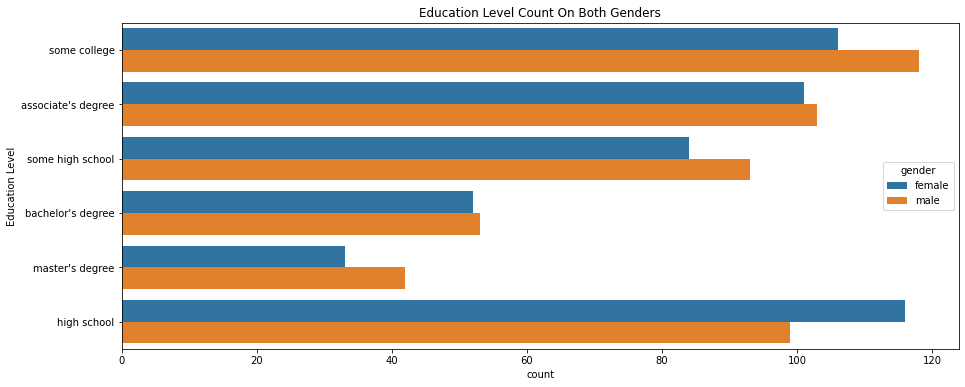

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_student_copy,y=level_education,hue="gender")
plt.title("Education Level Count On Both Genders")
plt.ylabel("Education Level")
plt.show()

##### Figure 7

<AxesSubplot:xlabel='Avg(Total Score)', ylabel='Density'>

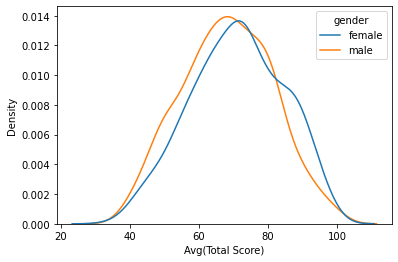

In [19]:
sns.kdeplot(x='Avg(Total Score)',data=df_student_copy,hue='gender')

##### Figure 8

<AxesSubplot:xlabel='Avg(Total Score)', ylabel='Density'>

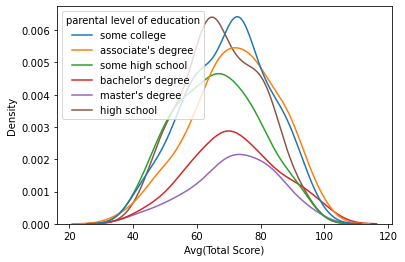

In [20]:
sns.kdeplot(x='Avg(Total Score)',data=df_student_copy,hue='parental level of education')

##### Figure 9

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

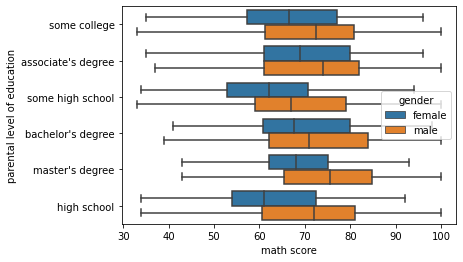

In [21]:
sns.boxplot(x='math score',y='parental level of education',data=df_student_copy,hue='gender')

##### Figure 10

In [22]:
#Counting each race group
races=df["race/ethnicity"].unique()
for race in races:
    print("There Are {} Races Belong to {}" \
          .format(df["race/ethnicity"][df["race/ethnicity"]==race].count(),race))

There Are 257 Races Belong to group D
There Are 198 Races Belong to group B
There Are 323 Races Belong to group C
There Are 143 Races Belong to group E
There Are 79 Races Belong to group A


<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

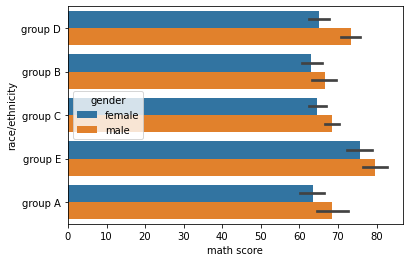

In [23]:
sns.barplot(x='math score',y='race/ethnicity',data=df_student_copy,hue='gender')

##### Figure 11

<AxesSubplot:xlabel='writing score', ylabel='race/ethnicity'>

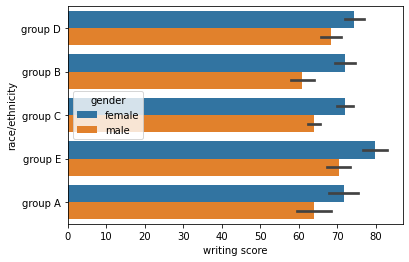

In [24]:
sns.barplot(x='writing score',y='race/ethnicity',data=df_student_copy,hue='gender')

##### Figure 12

<AxesSubplot:xlabel='reading score', ylabel='race/ethnicity'>

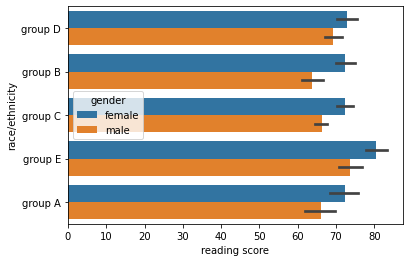

In [25]:
sns.barplot(x='reading score',y='race/ethnicity',data=df_student_copy,hue='gender')

##### Figure 13

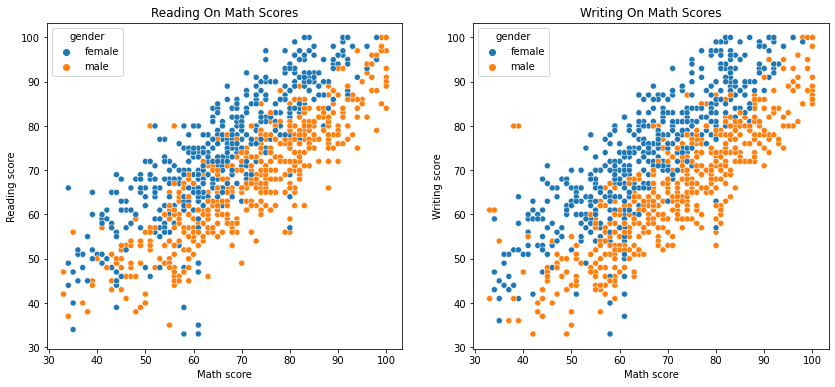

In [26]:
#Plotting Corrolation Between Scores
fig,axs=plt.subplots(1,2,figsize=(14,6))

sns.scatterplot(ax=axs[0],data=df_student_copy,x=n_cols[0],y=n_cols[1],hue="gender")
axs[0].set_title("Reading On Math Scores")
axs[0].set_xlabel(str(n_cols[0]).capitalize())
axs[0].set_ylabel(str(n_cols[1]).capitalize())

sns.scatterplot(ax=axs[1],data=df_student_copy,x=n_cols[0],y=n_cols[2],hue="gender")
axs[1].set_title("Writing On Math Scores")
axs[1].set_xlabel(str(n_cols[0]).capitalize())
axs[1].set_ylabel(str(n_cols[2]).capitalize())
plt.show()

##### Figure 14

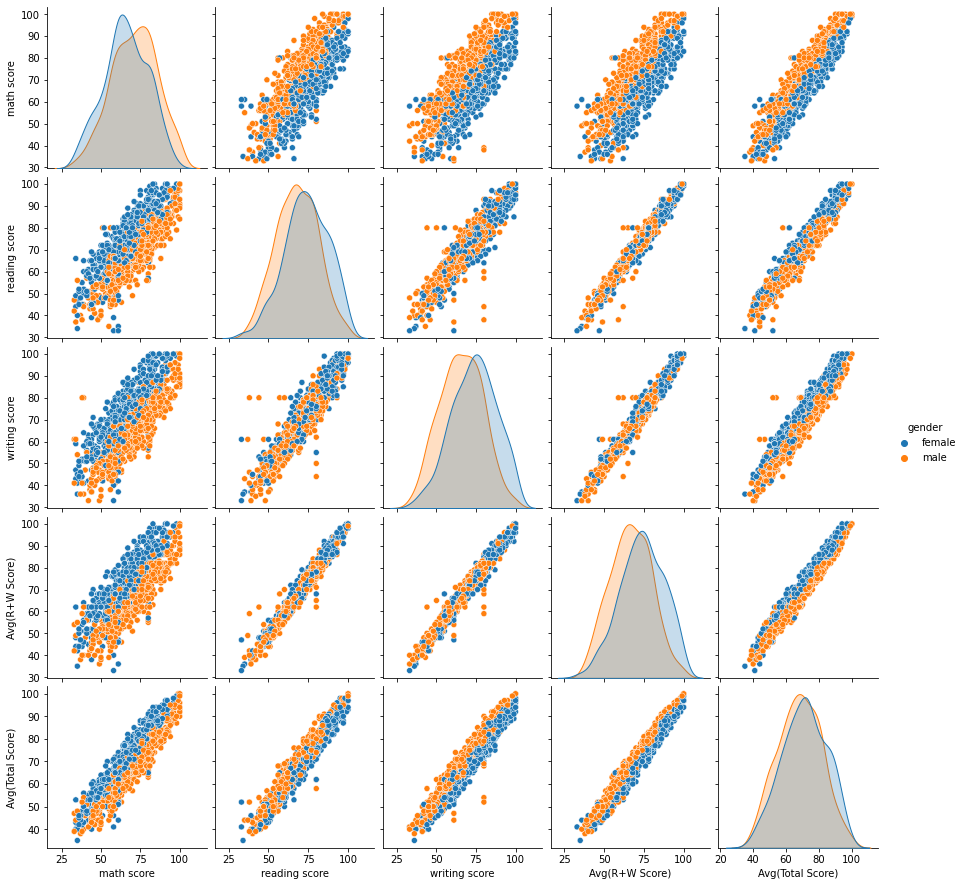

In [27]:
sns.pairplot(df_student_copy,hue='gender')

##### Figure 15

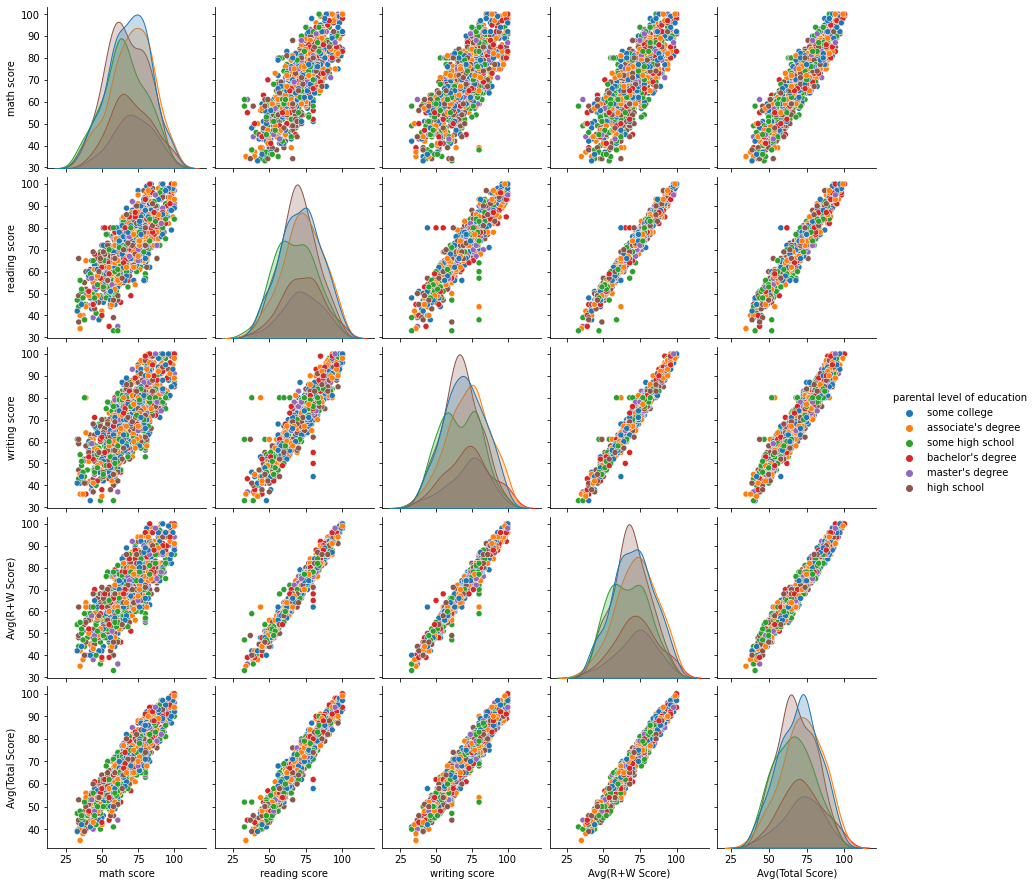

In [28]:
sns.pairplot(df_student_copy,hue='parental level of education')

##### Figure 16

<Figure size 432x288 with 0 Axes>

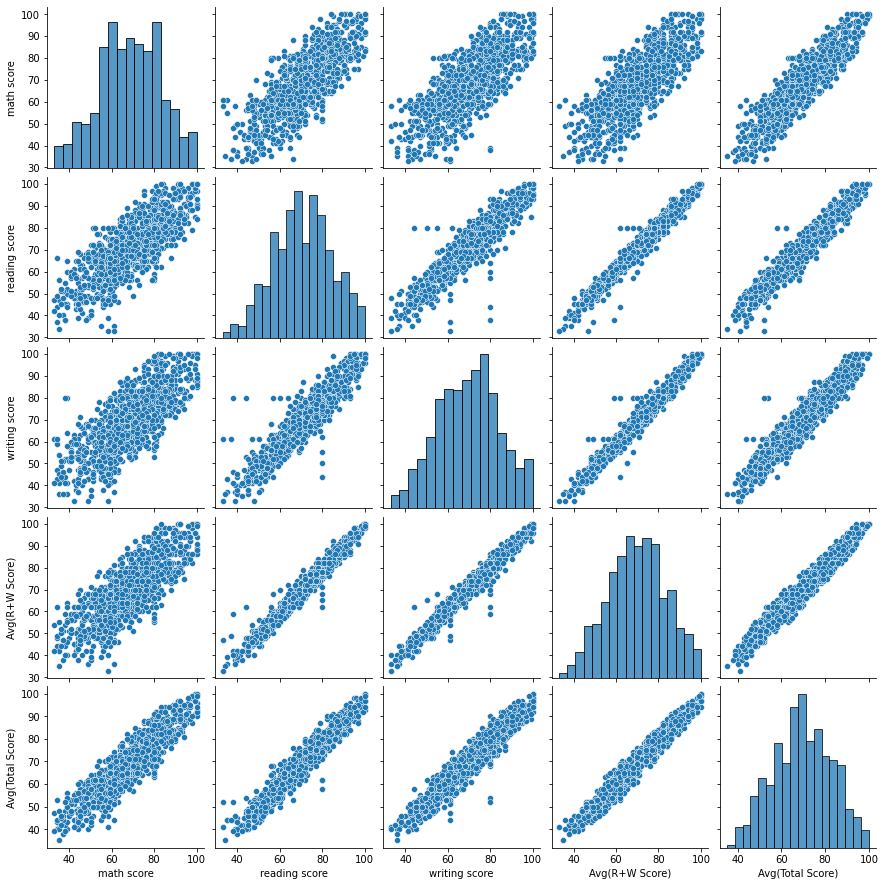

In [29]:
#Relationship maping
%matplotlib inline
import seaborn as sns
plt.figure()
sns.pairplot(df)

plt.show() ## ALL GRAPHS SHOULD BE REPRESENTED BEFORE ANY DATA CLEAING PROCESS

##### Figure 17

In [30]:
## Identify unique values within catagorical coulmns

seleted_cols = list(df.select_dtypes(include='object').columns)

for s in seleted_cols:
    print(df[s].unique())

['female' 'male']
['group D' 'group B' 'group C' 'group E' 'group A']
['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
['standard' 'free/reduced']
['completed' 'none']


In [31]:
df['gender'] = df['gender'].replace({"male":0,"female":1}) ## Female and Male are binary, so replace with binary
df['race/ethnicity'] = df['race/ethnicity'].replace({"group A":1,"group B":2,"group C":3,"group D":4,"group E":5})


cc =list(df['parental level of education'].unique())


for i,s in enumerate(cc):
    df['parental level of education'] = df['parental level of education'].replace({s:i+1})


df['test preparation course'] = df['test preparation course'].replace({"completed":1,"none":0})
df['lunch'] = df['lunch'].replace({"standard":1,"free/reduced":0})
## Save it on a clean file

df.to_csv('cleanData2',index=False,header=True)
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg(R+W Score),Avg(Total Score)
0,1,4,1,1,1,59.0,70.0,80.0,75.0,70.0
1,0,4,2,1,0,96.0,93.0,80.0,86.0,90.0
2,1,4,1,0,0,57.0,76.0,77.0,76.0,70.0
3,0,2,1,0,0,70.0,70.0,63.0,66.0,68.0
4,1,4,2,1,0,83.0,85.0,86.0,86.0,85.0
...,...,...,...,...,...,...,...,...,...,...
995,0,3,1,1,0,77.0,77.0,71.0,74.0,75.0
996,0,3,1,1,0,80.0,66.0,66.0,66.0,71.0
997,1,1,6,1,1,67.0,86.0,86.0,86.0,80.0
998,0,5,6,1,0,80.0,80.0,62.0,71.0,74.0


In [32]:
## Assessing the relationship between variable
corr = df.corr(method = 'pearson')
display(corr)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg(R+W Score),Avg(Total Score)
gender,1.000000,-0.048978,0.033718,-0.015708,0.032619,-0.182926,0.214656,0.280329,0.253784,0.108002
race/ethnicity,-0.048978,1.000000,-0.017780,0.006608,0.007457,0.248408,0.159174,0.163370,0.164661,0.203143
parental level of education,0.033718,-0.017780,1.000000,-0.022602,-0.014698,-0.043996,-0.035879,-0.048606,-0.041908,-0.046630
lunch,-0.015708,0.006608,-0.022602,1.000000,-0.087755,0.374406,0.246530,0.230589,0.243515,0.303732
test preparation course,0.032619,0.007457,-0.014698,-0.087755,1.000000,0.116608,0.213819,0.313809,0.270285,0.229772
math score,-0.182926,0.248408,-0.043996,0.374406,0.116608,1.000000,0.781531,0.752191,0.781784,0.902198
reading score,0.214656,0.159174,-0.035879,0.246530,0.213819,0.781531,1.000000,0.922377,0.979247,0.959709
writing score,0.280329,0.163370,-0.048606,0.230589,0.313809,0.752191,0.922377,1.000000,0.980931,0.950361
Avg(R+W Score),0.253784,0.164661,-0.041908,0.243515,0.270285,0.781784,0.979247,0.980931,1.000000,0.973776
Avg(Total Score),0.108002,0.203143,-0.046630,0.303732,0.229772,0.902198,0.959709,0.950361,0.973776,1.000000


In [33]:
## Corelation heatmap
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)# see pandas.DataFrame.style

/var/folders/h8/2m5b8xcx7l1_02hpgkm7ts4h0000gn/T/ipykernel_17774/1075310980.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)# see pandas.DataFrame.style


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg(R+W Score),Avg(Total Score)
gender,1.0000,-0.0490,0.0337,-0.0157,0.0326,-0.1829,0.2147,0.2803,0.2538,0.1080
race/ethnicity,-0.0490,1.0000,-0.0178,0.0066,0.0075,0.2484,0.1592,0.1634,0.1647,0.2031
parental level of education,0.0337,-0.0178,1.0000,-0.0226,-0.0147,-0.0440,-0.0359,-0.0486,-0.0419,-0.0466
lunch,-0.0157,0.0066,-0.0226,1.0000,-0.0878,0.3744,0.2465,0.2306,0.2435,0.3037
test preparation course,0.0326,0.0075,-0.0147,-0.0878,1.0000,0.1166,0.2138,0.3138,0.2703,0.2298
math score,-0.1829,0.2484,-0.0440,0.3744,0.1166,1.0000,0.7815,0.7522,0.7818,0.9022
reading score,0.2147,0.1592,-0.0359,0.2465,0.2138,0.7815,1.0000,0.9224,0.9792,0.9597
writing score,0.2803,0.1634,-0.0486,0.2306,0.3138,0.7522,0.9224,1.0000,0.9809,0.9504
Avg(R+W Score),0.2538,0.1647,-0.0419,0.2435,0.2703,0.7818,0.9792,0.9809,1.0000,0.9738
Avg(Total Score),0.1080,0.2031,-0.0466,0.3037,0.2298,0.9022,0.9597,0.9504,0.9738,1.0000


##### Figure 16

### Correlation analysis

From the correlation heatmap above, it looks like all numrical data have strong correlation between each other. However, all nominal data have weak correlation with every other data, weather numrical or nominal.

In [34]:
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg(R+W Score),Avg(Total Score)
0,1,4,1,1,1,59.0,70.0,80.0,75.0,70.0
1,0,4,2,1,0,96.0,93.0,80.0,86.0,90.0
2,1,4,1,0,0,57.0,76.0,77.0,76.0,70.0
3,0,2,1,0,0,70.0,70.0,63.0,66.0,68.0
4,1,4,2,1,0,83.0,85.0,86.0,86.0,85.0
...,...,...,...,...,...,...,...,...,...,...
995,0,3,1,1,0,77.0,77.0,71.0,74.0,75.0
996,0,3,1,1,0,80.0,66.0,66.0,66.0,71.0
997,1,1,6,1,1,67.0,86.0,86.0,86.0,80.0
998,0,5,6,1,0,80.0,80.0,62.0,71.0,74.0


In [35]:
# 3. Identify the top three correlated input variables to the output variable.

corr=corr.apply(lambda x: np.abs(x))

sorted_corr = corr.sort_values(by=['Avg(Total Score)'], ascending=False)

sorted_corr = sorted_corr['Avg(Total Score)'].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist())
print("Ranking of most correlated data with the output column Avg(Total Score):\n")
for i,s in enumerate(list(sorted_corr)):
    print(i+1,s)
print("\nThe top three correlated variablse are, excluding Avg(Total Score):")
for i in range(1,4):
    print(sorted_corr[i])

The top three correlated input variables are:  ['Avg(R+W Score)', 'reading score', 'writing score']
Ranking of most correlated data with the output column Avg(Total Score):

1 Avg(Total Score)
2 Avg(R+W Score)
3 reading score
4 writing score
5 math score
6 lunch
7 test preparation course
8 race/ethnicity
9 gender
10 parental level of education

The top three correlated variablse are, excluding Avg(Total Score):
Avg(R+W Score)
reading score
writing score


# Choosing an appropriate model

We have decided to predict our output using linear regression technique can identify one or more variables, and provide details on how input variables affect the output variable. Moreover, regression is a way of **predicting** an output variable, which reflects our objectives.

In [36]:
# Generate Train - Test splits to predict Avg(Total Score)
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values ## Avg(Total Score)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Scaling the Train - Test splits
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

print(A_train)

[[-0.98581488 -0.17088579  1.49355333 ... -0.49761229 -0.19967071
  -0.01424391]
 [ 1.01438923  0.70225327 -0.10831694 ... -0.29190642 -0.41349453
  -0.53124503]
 [-0.98581488  0.70225327  1.49355333 ...  0.32521118  0.44180072
   0.65047182]
 ...
 [-0.98581488 -1.04402485 -0.6422737  ...  0.3937798   0.44180072
   0.57661451]
 [ 1.01438923 -0.17088579 -0.6422737  ...  1.28517189  1.15454677
   0.87204373]
 [-0.98581488  0.70225327 -0.6422737  ... -0.42904366 -0.27094532
  -0.01424391]]


In [38]:
# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

The MSE using OLS is: 0.00035996761682885567
The MSE using Ridge is: 0.0003600033075957753
The MSE using Lasso is: 0.00036016985099885843


### OLS seems to preform best out of the other models

In [39]:
## Details of the best estimates
print('The intercept = :', reg1.intercept_)
print('The best coefficient estimates are:', reg1.coef_)

The intercept = : 0.0
The best coefficient estimates are: [-2.11592572e-04 -5.86959371e-04 -9.55012184e-04  5.82462357e-04
  1.09085567e-03  3.60363851e-01  3.32254531e-01  3.46969259e-01
  2.31667561e-02]


In [40]:
def regY(x1,x2,x3,x4,x5,x6,x7,x8,x9):
    y = reg1.intercept_+(x1*reg1.coef_[0])+(x2*reg1.coef_[1])+(x3*reg1.coef_[2])+(x4*reg1.coef_[3])+(x5*reg1.coef_[4])+(x6*reg1.coef_[5])+(x7*reg1.coef_[6])+(x8*reg1.coef_[7])+(x9*reg1.coef_[8])
    return y

### Testing model by inputs

In [41]:
x1 = int(input("Gender 0(Male) or 1(Female)> "))
x2 = int(input("race/ethnicity Group from 1 to 5> "))
print(['some college', "associate's degree", 'some high school',
 "bachelor's degree", "master's, degree", 'high school'])
x3 = int(input("parental level of education from 1 to 6 as indicated above> "))
x4 = int(input("lunch 1(standard) 0(free/reduce)> "))
x5 = int(input("test preparation course 1(completed) 0(none)> "))

x6 = int(input("Math score> "))
x7 = int(input("Reading score "))
x8 = int(input("Writing score> "))
x9 = (x7+x8)/2
y = regY(x1,x2,x3,x4,x5,x6,x7,x8,x9)
print("Actual value of y =",round((x6+x7+x8)/3,2) )
print("Expected Final Average Score =",np.round(y,2))
print("Residual =",round((x6+x7+x8)/3-y,2))

Gender 0(Male) or 1(Female)> 0
race/ethnicity Group from 1 to 5> 3
['some college', "associate's degree", 'some high school', "bachelor's degree", "master's, degree", 'high school']
parental level of education from 1 to 6 as indicated above> 4
lunch 1(standard) 0(free/reduce)> 1
test preparation course 1(completed) 0(none)> 0
Math score> 92
Reading score 94
Writing score> 100
Actual value of y = 95.33
Expected Final Average Score = 101.32
Residual = -5.99


### Testing model using cleanData2 file inputs

#### Random Experiment

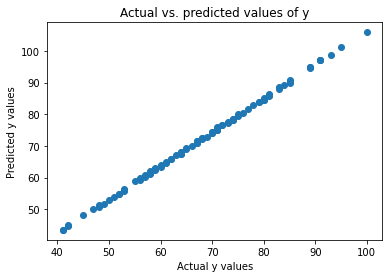

In [44]:
## Testing for 100 random outputs
## Chose from data and produce predicted output
y_actual = []
y_pred = []
for i in range(100):
    index = round(np.random.uniform(low=0, high=999))
    y_actual.append(df.iloc[index][-1]) # The actual recorded AVG(Total Score)
    y_pred.append(regY(df.iloc[index][0],df.iloc[index][1],df.iloc[index][2],df.iloc[index][3],df.iloc[index][4],df.iloc[index][5],df.iloc[index][6],df.iloc[index][7],df.iloc[index][8]))
    
plt.scatter(y_actual, y_pred)
plt.xlabel("Actual y values")
plt.ylabel("Predicted y values")
plt.title("Actual vs. predicted values of y")
plt.show()

##### Figure 18

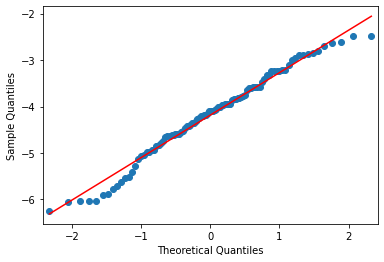

In [45]:
residuals = np.array(y_actual) - np.array(y_pred)
qqplot(residuals, line='s')
plt.show()

##### Figure 19

# Conclusion

### We conclude from this report that, we are now able to predict the average final score for any other student due to having a small Mean Squared Error value. Therefore, we were able to build a good model using linear regression technique for prediction. Moreover, according to figure 18 and figure 19 we can conclude linearity assumption by looking at the actual output values versus the predicted output values.

# Key Findings

1- According to figure 10, it looks that the median math score on every parental level of education is higher in male students.

2- According figure 11,12,13, Group E perform better at all topics for both genders by looking at median and inter quartile range in the boxplot.

3- Figure 11,12,13 shows that males perform better than females at math. However, females perform better at both reading and writing.

#### Note:

There were another findings that were mentioned on some other graphs.